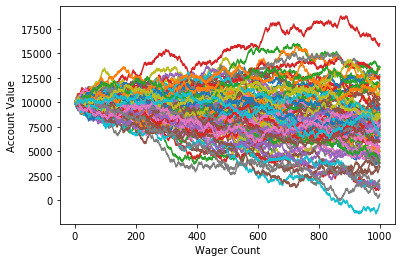

In [8]:
import random
import matplotlib
import matplotlib.pyplot as plt

def rollDice():
    roll = random.randint(1,100)

    if roll == 100:
        return False
    elif roll <= 50:
        return False
    elif 100 > roll >= 50:
        return True


'''
Simple bettor, betting the same amount each time.
'''
def simple_bettor(funds,initial_wager,wager_count):
    value = funds
    wager = initial_wager

    # wager X
    wX = []

    #value Y
    vY = []

    # change to 1, to avoid confusion so we start @ wager 1
    # instead of wager 0 and end at 100. 
    currentWager = 1

    #           change this to, less or equal.
    while currentWager <= wager_count:
        if rollDice():
            value += wager
            # append #
            wX.append(currentWager)
            vY.append(value)
            
        else:
            value -= wager
            # append #
            wX.append(currentWager)
            vY.append(value)

        currentWager += 1
        
    #print 'Funds:', value

    plt.plot(wX,vY)
    


x = 0

# start this off @ 1, then add, and increase 50 to 500, then 1000
while x < 100:
    simple_bettor(10000,100,1000)
    x += 1


plt.ylabel('Account Value')
plt.xlabel('Wager Count')
plt.show()

('death rate:', 1.4000000000000001)
('survival rate:', 98.6)


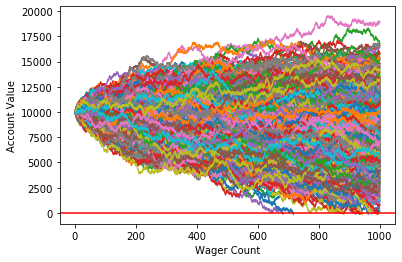

In [9]:
import random
import matplotlib
import matplotlib.pyplot as plt
import time

def rollDice():
    roll = random.randint(1,100)

    if roll == 100:
        return False
    elif roll <= 50:
        return False
    elif 100 > roll >= 50:
        return True


def doubler_bettor(funds,initial_wager,wager_count):
    global broke_count
    value = funds
    wager = initial_wager
    wX = []
    vY = []
    currentWager = 1
    previousWager = 'win'
    previousWagerAmount = initial_wager

    while currentWager <= wager_count:
        if previousWager == 'win':
            if rollDice():
                value += wager
                wX.append(currentWager)
                vY.append(value)
            else:
                value -= wager 
                previousWager = 'loss'
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                if value < 0:
                    broke_count += 1
                    currentWager += 10000000000000000
        elif previousWager == 'loss':
            if rollDice():
                wager = previousWagerAmount * 2
                value += wager
                wager = initial_wager
                previousWager = 'win'
                wX.append(currentWager)
                vY.append(value)
            else:
                wager = previousWagerAmount * 2
                value -= wager
                previousWager = 'loss'
                previousWagerAmount = wager
                wX.append(currentWager)
                vY.append(value)
                if value < 0:
                    currentWager += 10000000000000000
                    broke_count += 1

        currentWager += 1

    plt.plot(wX,vY)


def simple_bettor(funds,initial_wager,wager_count):
    ####
    global broke_count
    
    value = funds
    wager = initial_wager
    wX = []
    vY = []
    currentWager = 1
    while currentWager <= wager_count:
        if rollDice():
            value += wager
            wX.append(currentWager)
            vY.append(value)
        else:
            value -= wager
            wX.append(currentWager)
            vY.append(value)

            ###add me
            if value < 0:
                currentWager += 10000000000000000
                broke_count += 1
        currentWager += 1
    plt.plot(wX,vY)

    
x = 0
broke_count = 0
while x < 1000:             
    simple_bettor(10000,100,1000)
    x+=1
print(('death rate:',(broke_count/float(x)) * 100))
print(('survival rate:',100 - ((broke_count/float(x)) * 100)))
plt.axhline(0, color = 'r')
plt.ylabel('Account Value')
plt.xlabel('Wager Count')
plt.show()